In [2]:
%matplotlib inline
from scipy.stats import binom, norm
from numpy import linspace
from pandas import Series
from matplotlib.pyplot import figure, savefig, ylim, gca, plot, fill_between
from matplotlib import rc
from seaborn import barplot
rc('text', usetex=True)
rc('font', family='serif', serif='Times', size=20)

In [12]:
def f(mu=75, sigma=9.5, alpha=0.05, tail='upper', error='I'):   
        
    x   = linspace( mu-4*sigma, mu+4*sigma , 500)
    zalpha1 = norm.ppf(  alpha, mu, sigma)
    zalpha2 = norm.ppf(1-alpha, mu, sigma)
 
    def fill(w1,w2, color='red', x=x, sigma=sigma, mu=mu):
        where = [ w1[i] or w2[i] for i in range(len(w1)) ]
        fill_between(x, norm.pdf(x,mu,sigma), where=where, color=color)
        return None
   
    x1 = [ x[i] <=zalpha1 for i in range(len(x)) ]    
    x3 = [ x[i] >=zalpha2 for i in range(len(x)) ]
    x2 = [ not (x1[i] or x3[i])  for i in range(len(x)) ]
              
    figure( figsize=(12,5) )
    
    if ( tail=='upper' or tail=='two'):
        plot([zalpha2]*2, [0,1], linestyle='--', color='black')
        gca().annotate( 'Rifiuto', 
                    xy=(norm.ppf(1-alpha)/8+0.5, 0.9),  
                    color='red', 
                    xycoords='axes fraction' )
        
    if ( tail=='lower' or tail=='two' ):
        plot([zalpha1]*2, [0,1], linestyle='--', color='black') 
        gca().annotate( 'Rifiuto',
                        xy=(norm.ppf(alpha)/8+0.5, 0.9),
                        color='red',
                        horizontalalignment='right', 
                        xycoords='axes fraction' )
    if (error=='I'):
        gca().annotate(r'$\alpha= P(T_+|H_0)\ \simeq\ ${:.2f}'.format(alpha), 
                       xy=(0.98,0.45), 
                       color='red', 
                       horizontalalignment='right', 
                       xycoords='axes fraction')
    if (error=='II'):
        if (mu>0.5): xy=(0.02,0.45); al='left' 
        else:  xy=(0.98,0.45); al='right' 
        
        gca().annotate(r'$\beta=P(T_-|H_A)\ \simeq\ ${:.2f}'.format(alpha),
                    color='blue',  
                    xy=xy, 
                    horizontalalignment=al, 
                    xycoords='axes fraction') 
        
    gca().annotate( '$\mu_0={}$\n $\sigma={}$'.format(mu,sigma), 
                    xy=(0.02, 0.72), 
                    linespacing=1.8, 
                    xycoords='axes fraction' )
    
    gca().annotate( 'Non Rifiuto', xy=(0.5, 0.9), 
                    horizontalalignment='center', 
                    xycoords='axes fraction' )
    
    plot(x, norm.pdf(x,mu,sigma), color='black', lw=2 )
    
    if (tail=='lower' and error=='I'): fill(x1, x1)
    if (tail=='upper' and error=='I'): fill(x3, x3)
    if (tail=='two'   and error=='I'): fill(x1, x3)
    if (tail=='lower' and error=='II'): fill(x2, x3, color='blue')
    if (tail=='upper' and error=='II'): fill(x1, x2, color='blue')
    if (tail=='two'   and error=='II'): fill(x2, x2, color='blue')

    return None

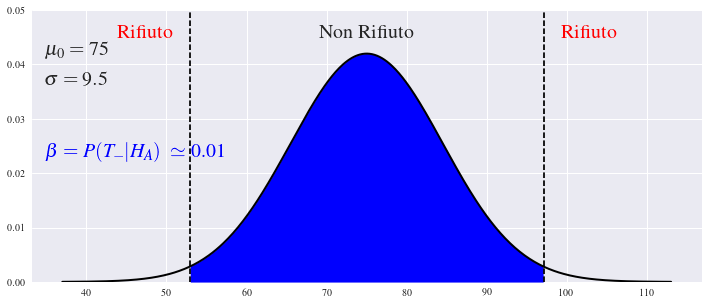

In [13]:
f(mu=75, sigma=9.5, alpha=0.05, tail='two', error='II')
ylim(0, 0.05)
savefig('Z-text_01.pdf',bbox_inches='tight')

In [125]:
p=0.25

y = Series( binom.pmf(range(n+1),n,p) )
q = sum(y[y.index<k])

f = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(6.7, .12, '$P(T_-|D)$\ =\ {:.4f}'.format(q), color='blue')
plot([12.5,12.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p003.pdf',bbox_inches='tight')

NameError: name 'n' is not defined

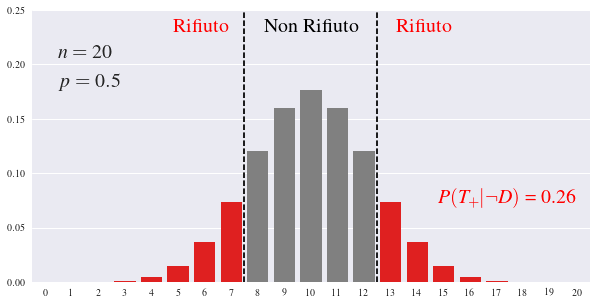

In [46]:
p=0.5

y = Series( binom.pmf(range(n+1),n,p) )
q = 2 * sum(y[y.index>=k])

f4 = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['red' if (i >= k) or (i <= n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(6.9, 0.23, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(20, 0.07, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')

plot([12.5,12.5],[0,1], linestyle='--', color='black')
plot([7.5,7.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p004.pdf',bbox_inches='tight')

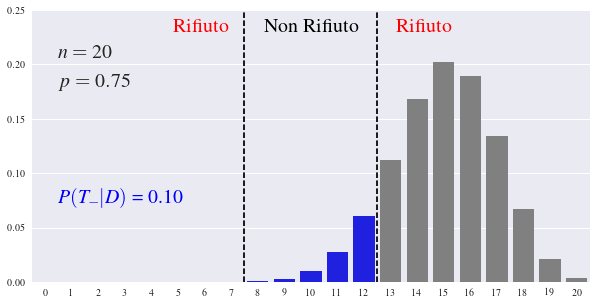

In [47]:
p=0.75

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f5 = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) and (i >= n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(6.9, 0.23, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(0.5, .07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')

plot([12.5,12.5],[0,1],  linestyle='--', color='black')
plot([7.5,7.5],[0,1],  linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p005.pdf',bbox_inches='tight')

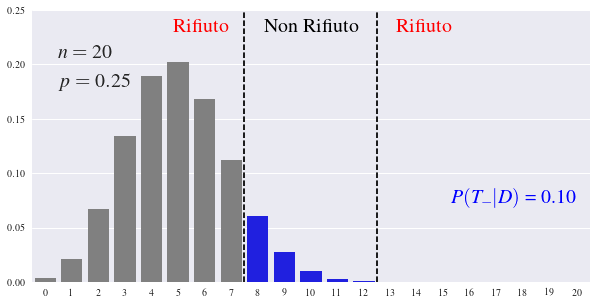

In [48]:
p=0.25

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f6 = figure(figsize=(10,5))
ylim(0, 0.25)
palette = ['blue' if (i < k) and (i > n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .18, '$n=20$\n' '$p={}$'.format(p), linespacing=1.8)
gca().text(13.2, 0.23, 'Rifiuto', color='red')
gca().text(6.9, 0.23, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(10, 0.23, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(20, 0.07, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue', horizontalalignment='right')

plot([12.5,12.5],[0,1],  linestyle='--', color='black')
plot([7.5,7.5],[0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)
savefig('p006.pdf',bbox_inches='tight')

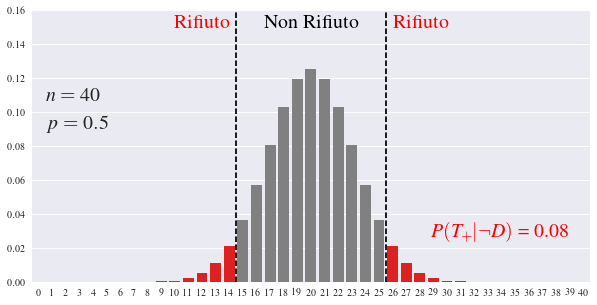

In [53]:
n=40; k=26; p=0.5

y = Series( binom.pmf(range(n+1),n,p) )
q = 2 * sum(y[y.index>=k])

f4 = figure(figsize=(10,5))
ylim(0, 0.16)
palette = ['red' if (i >= k) or (i <= n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .09, '$n={}$\n' '$p={}$'.format(n,p), linespacing=1.8)
gca().text(k, 0.15, 'Rifiuto', color='red')
gca().text(n-k, 0.15, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(n/2, 0.15, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(n-1, 0.025, r'$P(T_+|\neg D)$\ =\ {:.2f}'.format(q), color='red', horizontalalignment='right')

plot([k-0.5, k-0.5], [0,1], linestyle='--', color='black')
plot([n-k+0.5, n-k+0.5], [0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)

savefig( 'p007.pdf', bbox_inches='tight' )

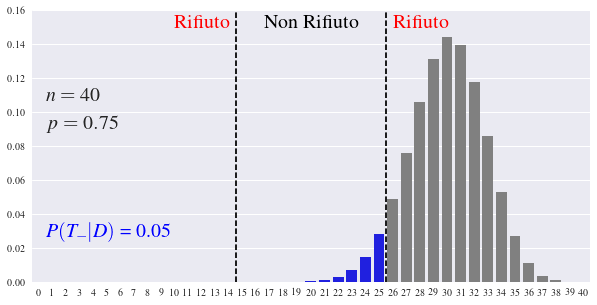

In [50]:
n=40; k=26; p=0.75

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f4 = figure(figsize=(10,5))
ylim(0, 0.16)
palette = ['blue' if (i < k) and (i > n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .09, '$n={}$\n' '$p={}$'.format(n,p), linespacing=1.8)
gca().text(k, 0.15, 'Rifiuto', color='red')
gca().text(n-k, 0.15, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(n/2, 0.15, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(0.5, .025, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue')

plot([k-0.5, k-0.5], [0,1], linestyle='--', color='black')
plot([n-k+0.5, n-k+0.5], [0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)

savefig( 'p008.pdf', bbox_inches='tight' )

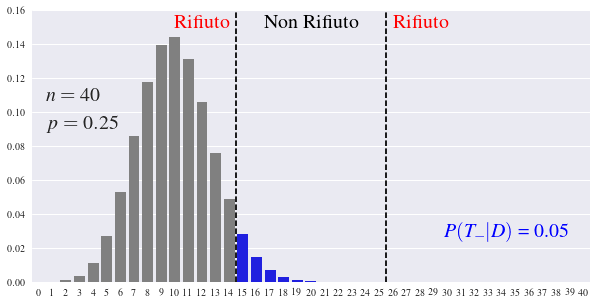

In [51]:
n=40; k=26; p=0.25

y = Series( binom.pmf(range(n+1),n,p) )
q = sum( y[y.index<k] ) -  sum( y[y.index<=n-k] )

f4 = figure(figsize=(10,5))
ylim(0, 0.16)
palette = ['blue' if (i < k) and (i > n-k) else 'gray' for i in range(n+1) ]
gca().text(0.5, .09, '$n={}$\n' '$p={}$'.format(n,p), linespacing=1.8)
gca().text(k, 0.15, 'Rifiuto', color='red')
gca().text(n-k, 0.15, 'Rifiuto', color='red', horizontalalignment='right')
gca().text(n/2, 0.15, 'Non Rifiuto', color='black', horizontalalignment='center')
gca().text(n-1, .025, '$P(T_-|D)$\ =\ {:.2f}'.format(q), color='blue', horizontalalignment='right')

plot([k-0.5, k-0.5], [0,1], linestyle='--', color='black')
plot([n-k+0.5, n-k+0.5], [0,1], linestyle='--', color='black')
barplot(x=y.index, y=y, palette=palette)

savefig( 'p009.pdf', bbox_inches='tight' )